In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function, absolute_import, division

In [3]:
import numpy as np
from GomokuBoard import GomokuBoard
from HeuristicPolicy import Move, StochasticMaxSampler, HeuristicGomokuPolicy, ThreatSearch
from Heuristics import Heuristics
from GomokuTools import GomokuTools as gt

In [4]:
A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U = \
    1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
BLACK=0
WHITE=1
EDGES=2

## A sampler
This class allows to sample from the top n of an array of scores, 
with higher probability for the larger scores. With bias > 1.0,
the sampler has an even higher bias toward the larger scores.


In [5]:
sample = np.random.randint(0, 100, [8,8])/20.0
enumerated = list(np.ndenumerate(sample))
sampler = StochasticMaxSampler(enumerated, 10, bias=5)
sampler.choices

[(0.707999151516767, (4, 0), 0.2920008484832329, 4.85),
 (0.4805886620605103, (6, 1), 0.22741048945625664, 4.8),
 (0.303481194793326, (1, 7), 0.17710746726718427, 4.75),
 (0.21982155101563422, (6, 6), 0.08365964377769179, 4.6),
 (0.13616190723794244, (2, 3), 0.08365964377769179, 4.6),
 (0.08541976830613504, (1, 1), 0.050742138931807394, 4.5),
 (0.03467762937432764, (0, 6), 0.050742138931807394, 4.5),
 (0.020139763167418615, (3, 7), 0.014537866206909023, 4.25),
 (0.008817661581290544, (3, 2), 0.01132210158612807, 4.2),
 (0.0, (4, 4), 0.008817661581290544, 4.15)]

In [6]:
print([sampler.draw() for i in range(10)])

[(6, 1), (1, 7), (4, 0), (1, 7), (2, 3), (6, 1), (4, 0), (4, 0), (1, 7), (1, 7)]


## Use a policy to play a bit

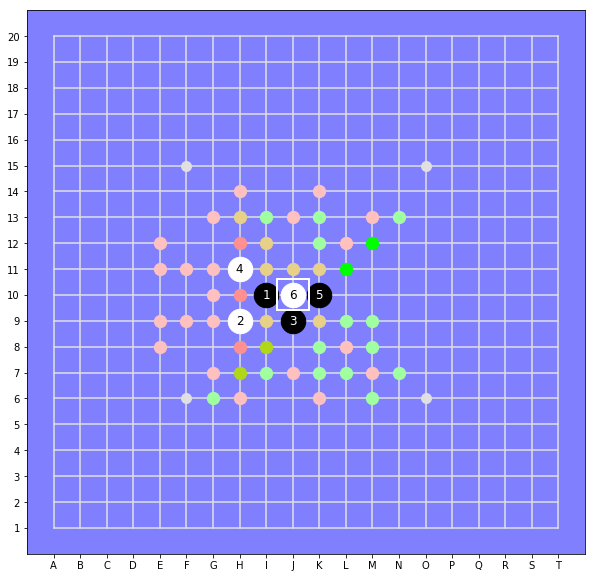

In [7]:
h = Heuristics(kappa=3.0)
board = GomokuBoard(h, N=20, disp_width=10)
p = HeuristicGomokuPolicy(board, style = 2, bias=.5, topn=5, threat_search=ThreatSearch(5,3))
board.set(I,10).set(H,9).set(J,9).set(H,11).set(K,10).set(J,10)
board.display('current');

CPU times: user 3.16 s, sys: 400 ms, total: 3.56 s
Wall time: 3.56 s
Style: 2: (K, 9)
Value after the move: -40.21966338430434


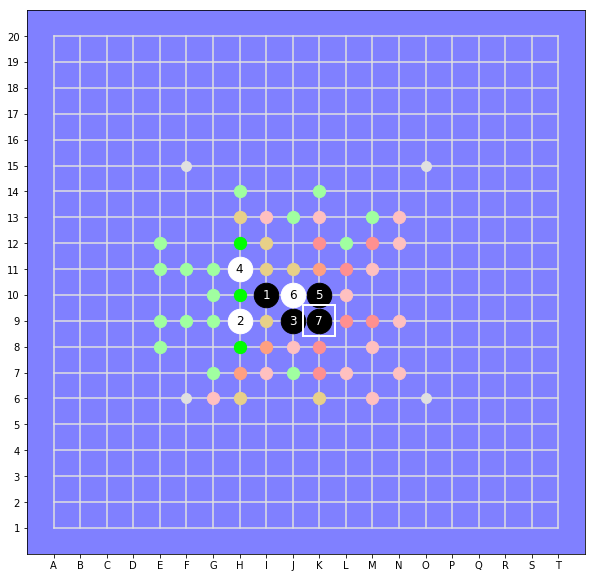

In [8]:
%time move = p.suggest()
print(move)
if move.status == 0:
    board.set(move.x, move.y) 
    print("Value after the move: %s" % board.get_value())
else:
    print("GAME OVER!")
board.display('current')

## Self play

Black 7: - Style: 0: (N, 13)
White 8: - Style: 2: (H, 7)
Black 9: - Style: 0: (K, 13)
White 10: - Style: 2: (M, 12)
Black 11: - Style: 0: (M, 6)
White 12: - Style: 2: (K, 8)
Black 13: - Defending lurking threat sequence: (H, 8)
White 14: - Style: 2: (L, 13)
Black 15: - Style: 0: (L, 9)
White 16: - Defending lurking threat sequence: (M, 8)
Black 17: - Style: 0: (H, 13)
White 18: - Style: 2: (K, 12)
Black 19: - Defending lurking threat sequence: (L, 8)
White 20: - Pursuing winning threat sequence: (M, 14)
Black 21: - Defending Win-in-2: (N, 15)
White 22: - Pursuing winning threat sequence: (M, 13)
Black 23: - Defending Win-in-2: (M, 15)
White 24: - Soft-win-in-2: (L, 12)
Black 25: - Defending Win-in-2: (K, 11)
White 26: - Win-in-2: (J, 12)
White wins.


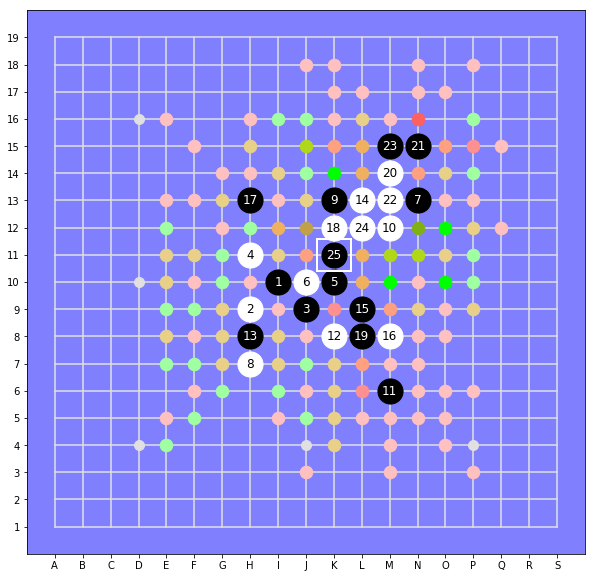

In [18]:
def play_game(options, board, black, white):
    verbose=options['verbose']
    winner = 0
    for _ in range(30):
        move = black.suggest()
        if verbose >= 2:
            print("Black %s: - %s" % (len(board.stones)+1, str(move)))
        if move.status != 0:
            winner = move.status
            break
        # Some strange things do happen!
        elif move.x == 0:
            winner = 0
            break
        board.set(move.x, move.y)
        move = white.suggest()
        if verbose >= 2:
            print("White %s: - %s" % (len(board.stones)+1, str(move)))
        if move.status != 0:
            winner = -move.status
            break
        board.set(move.x, move.y)
    if verbose >= 1:
        print("Black wins." if winner == 1 else "White wins." if winner == -1 else "Not decided yet." )
    return board, gt.stones_to_string(board.stones), winner


game="i10h9j9h11k10j10"
board = GomokuBoard(h, N=19, disp_width=10, stones=gt.string_to_stones(game))

# Loose (bias=.5), aggressive (style=0), forward-looking (thread_search)
black = HeuristicGomokuPolicy(board, style = 0, bias=0.5, topn=5, 
                              threat_search=ThreatSearch(5,5))

# Tighter (bias=1.0), defensive (style=2), not as much forward-looking (thread_search)
white = HeuristicGomokuPolicy(board, style = 2, bias=1.0, topn=5, 
                              threat_search=ThreatSearch(4,4))

board, _, _ = play_game({'verbose': 2}, board, black, white)
board.display('current')

Black 7: - Style: 0: (G, 6)
White 8: - Style: 2: (M, 12)
Black 9: - Style: 0: (L, 11)
White 10: - Style: 2: (L, 12)
Black 11: - Style: 0: (K, 9)
White 12: - Style: 2: (M, 9)
Black 13: - Defending lurking threat sequence: (K, 11)
White 14: - Defending Win-in-2: (K, 12)
Black 15: - Defending Win-in-2: (J, 12)
White 16: - Style: 2: (N, 11)
Black 17: - Pursuing winning threat sequence: (K, 8)
White 18: - Defending immediate threat: (K, 7)
Black 19: - Pursuing winning threat sequence: (I, 8)
White 20: - Defending immediate threat: (H, 7)
Black 21: - Soft-win-in-2: (I, 11)
White 22: - Defending Win-in-2: (I, 9)
Black 23: - Defending Win-in-2: (H, 10)
White 24: - Defending Win-in-2: (G, 9)
Black 25: - Pursuing winning threat sequence: (I, 13)
White 26: - Defending Win-in-2: (H, 14)
Black 27: - Pursuing winning threat sequence: (I, 12)
White 28: - Defending immediate threat: (I, 14)
Black 29: - Soft-win-in-2: (J, 11)
White 30: - Defending immediate threat: (M, 11)
Black 31: - Win-in-2: (H, 13)

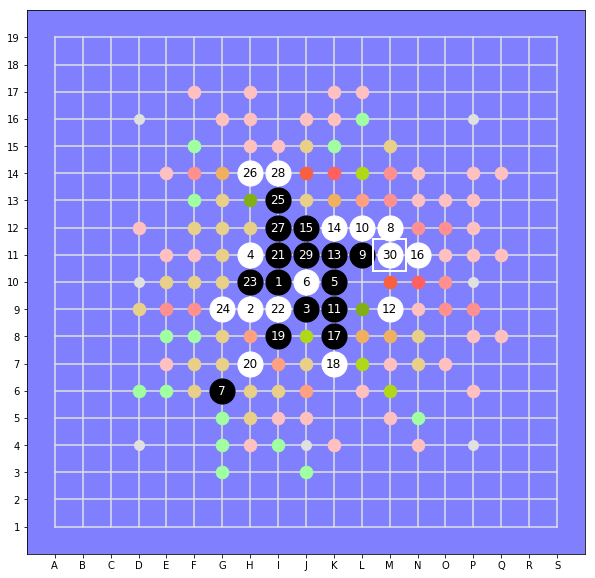

In [21]:
game="i10h9j9h11k10j10"
board = GomokuBoard(h, N=19, disp_width=10, stones=gt.string_to_stones(game))

# Tight (bias=2.0), aggressive (style=0), forward-looking (thread_search)
black = HeuristicGomokuPolicy(board, style = 0, bias=0.5, topn=5, 
                              threat_search=ThreatSearch(5,5))

# Very tight (bias=10.0), defensive (style=2), not as much forward-looking (thread_search)
white = HeuristicGomokuPolicy(board, style = 2, bias=2.0, topn=5, 
                              threat_search=ThreatSearch(4,4))

board, _, _ = play_game({'verbose': 2}, board, black, white)
board.display('current')

In [19]:
game="i10h9j9h11k10j10"
results=[]
for _ in range(100):
    board = GomokuBoard(h, N=19, disp_width=10, stones=gt.string_to_stones(game))
    black = HeuristicGomokuPolicy(board, style = 0, bias=0.5, topn=5, threat_search=ThreatSearch(3,3))
    white = HeuristicGomokuPolicy(board, style = 2, bias=1.0, topn=5, threat_search=ThreatSearch(2,3))
    board, record, status = play_game({'verbose': 1}, board, black, white)
    results.append([record, status])

Black wins.
Black wins.
White wins.
Black wins.
Black wins.
Black wins.
Black wins.
Black wins.
Black wins.
Black wins.
White wins.
Black wins.
Black wins.
Black wins.
Black wins.
Black wins.
Black wins.
White wins.
Black wins.
Not decided yet.
Black wins.
Black wins.
White wins.
White wins.
Black wins.
Black wins.
Black wins.
White wins.
Black wins.
White wins.
Black wins.
Not decided yet.
Black wins.
Black wins.
Black wins.
Black wins.
Black wins.


KeyboardInterrupt: 

In [12]:
import pandas as pd

In [11]:
df = pd.DataFrame(results)
df.columns=['game', 'winner']
df.to_csv("self_play_games-6.csv", index=None)

NameError: name 'results' is not defined

In [111]:
df.head()

,game,winner
0,i10h9j9h11k10j10m6m12l7k8l6n6k6h7m8n9l9j11,1
1,i10h9j9h11k10j10g6m12k9m9k7k8h6i6h7i8i7j8,1
2,i10h9j9h11k10j10g6m12k9m9l7k8h6j6i8h7i7j8,1
3,i10h9j9h11k10j10l9l11i12j11i11i9h8i8n7i14g9i7f...,-1
4,i10h9j9h11k10j10g6m12k9k8n9m8h6i6i7j8l8h5j7h7g...,1


In [13]:
df1 = pd.read_csv("self_play_games-1.csv")
df2 = pd.read_csv("self_play_games-2.csv")
df3 = pd.read_csv("self_play_games-3.csv")
df4 = pd.read_csv("self_play_games-4.csv")
df5 = pd.read_csv("self_play_games-5.csv")
df6 = pd.read_csv("self_play_games-6.csv")

In [14]:
dfm = df1.append(df2).append(df3).append(df4).append(df5).append(df6)
dfm.count()

game      500
winner    500
dtype: int64

In [15]:
dfm[dfm['winner']==-1].count()

game      127
winner    127
dtype: int64